In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.ticker as mticker
import time
import csv
import zoneinfo
import matplotlib.pyplot as plt
import matplotlib.colors
import math

In [2]:
data_fn = '../data/amazon_reviews_daily.csv'
df = pd.read_csv(data_fn)
display(df)

,category,830934000.0,831020400.0,831106800.0,831193200.0,831279600.0,831366000.0,831452400.0,831538800.0,831625200.0,...,1695193200.0,1695279600.0,1695366000.0,1695452400.0,1695538800.0,1695625200.0,1695711600.0,1695798000.0,1695884400.0,1695970800.0
0,Amazon_Fashion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Appliances,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arts_Crafts_and_Sewing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Automotive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Baby_Products,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Beauty_and_Personal_Care,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Books,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CDs_and_Vinyl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Cell_Phones_and_Accessories,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Clothing_Shoes_and_Jewelry,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
timeseries = df.to_numpy()
# remove columns
timeseries = timeseries[:,1:]
# remove zero rows
timeseries = timeseries[~np.all(timeseries == 0, axis=1)]

time_interval = 60*60*24
time_arr = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).strftime('%m-%d-%Y') for timestamp in df.columns[1:]])
years = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).strftime('%Y') for timestamp in df.columns[1:]])
months = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).strftime('%m') for timestamp in df.columns[1:]])
weekdays_timestamps = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).weekday() for timestamp in df.columns[1:]])
timeseries_len = timeseries.shape[1]

categories = df['category'].to_numpy()

print(timeseries.shape)

(33, 10013)


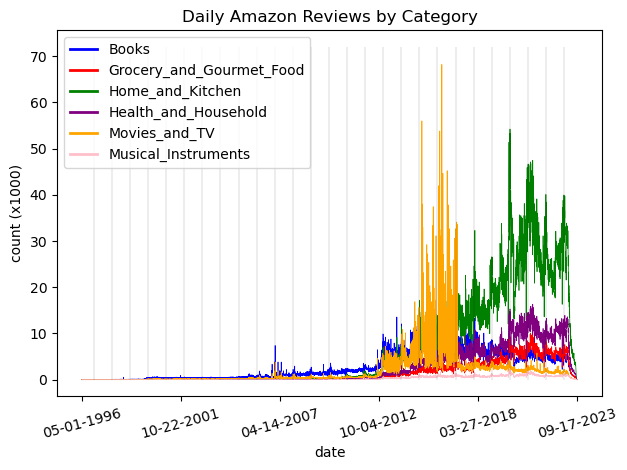

In [69]:
scale = 1000

# make figure + axes
fig, ax = plt.subplots(tight_layout=True)
ax.set_xlabel('date')
ax.set_ylabel(f'count (x{scale})')
plt.title("Daily Amazon Reviews by Category")

rand_ind = np.random.choice(np.arange(timeseries.shape[0]), 6, replace=False)
# draw one line
ln1, = ax.plot(timeseries[rand_ind[0]]/scale, c='blue', lw=0.5)
ln2, = ax.plot(timeseries[rand_ind[1]]/scale, c='red', lw=0.5)
ln3, = ax.plot(timeseries[rand_ind[2]]/scale, c='green', lw=0.5)
ln4, = ax.plot(timeseries[rand_ind[3]]/scale, c='purple', lw=0.5)
ln5, = ax.plot(timeseries[rand_ind[4]]/scale, c='orange', lw=0.5)
ln6, = ax.plot(timeseries[rand_ind[5]]/scale, c='pink', lw=0.5)
ax.vlines(np.where(years[:-1] != years[1:])[0],0,math.ceil(ax.get_ylim()[1]),colors='black', linewidth=0.1)

leg = ax.legend(categories[rand_ind], markerscale=1)
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(2.0)

# helper function for the formatter
def listifed_formatter(x, pos=None):
    try:
        return time_arr[int(x)]
    except IndexError:
        return ''

# make and use the formatter
mt = mticker.FuncFormatter(listifed_formatter)
ax.xaxis.set_major_formatter(mt)

# set the default ticker to only put ticks on the integers
loc = ax.xaxis.get_major_locator()
loc.set_params(integer=True)

# rotate the labels
[lab.set_rotation(15) for lab in ax.get_xticklabels()]
plt.show()

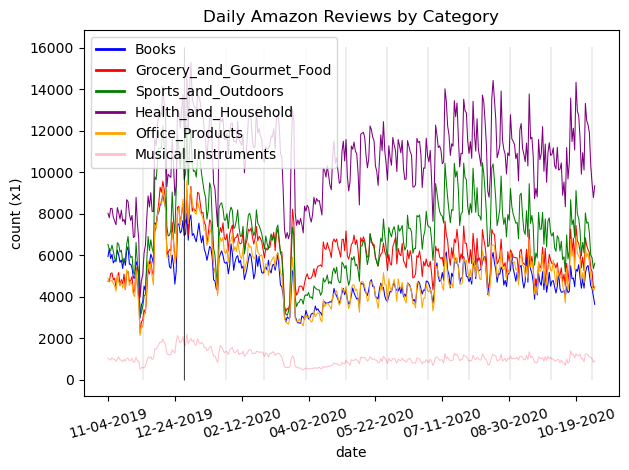

In [60]:
scale = 1

year_interval = 60*60*24*365
start_date = np.random.randint(0,timeseries_len-year_interval//time_interval)

# make figure + axes
fig, ax = plt.subplots(tight_layout=True)
ax.set_xlabel('date')
ax.set_ylabel(f'count (x{scale})')
plt.title("Daily Amazon Reviews by Category")

rand_ind = np.random.choice(np.arange(timeseries.shape[0]), 6, replace=False)
# draw one line
ln1, = ax.plot(timeseries[rand_ind[0], start_date:start_date+year_interval//time_interval]/scale, c='blue', lw=0.75)
ln2, = ax.plot(timeseries[rand_ind[1], start_date:start_date+year_interval//time_interval]/scale, c='red', lw=0.75)
ln3, = ax.plot(timeseries[rand_ind[2], start_date:start_date+year_interval//time_interval]/scale, c='green', lw=0.75)
ln4, = ax.plot(timeseries[rand_ind[3], start_date:start_date+year_interval//time_interval]/scale, c='purple', lw=0.75)
ln5, = ax.plot(timeseries[rand_ind[4], start_date:start_date+year_interval//time_interval]/scale, c='orange', lw=0.75)
ln6, = ax.plot(timeseries[rand_ind[5], start_date:start_date+year_interval//time_interval]/scale, c='pink', lw=0.75)


cut_time_arr = time_arr[start_date:start_date+year_interval//time_interval]
cut_years = years[start_date:start_date+year_interval//time_interval]
cut_months = months[start_date:start_date+year_interval//time_interval]
# helper function for the formatter
def listifed_formatter(x, pos=None):
    try:
        return cut_time_arr[int(x)]
    except IndexError:
        return ''
    
y_lim = math.ceil(ax.get_ylim()[1])
ax.vlines(np.where(cut_years[:-1] != cut_years[1:])[0],0,y_lim,colors='black', linewidth=0.5)
ax.vlines(np.where(cut_months[:-1] != cut_months[1:])[0],0,y_lim,colors='black', linewidth=0.1)
leg = ax.legend(categories[rand_ind], markerscale=1)
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(2.0)

# make and use the formatter
mt = mticker.FuncFormatter(listifed_formatter)
ax.xaxis.set_major_formatter(mt)

# set the default ticker to only put ticks on the integers
loc = ax.xaxis.get_major_locator()
loc.set_params(integer=True)

# rotate the labels
[lab.set_rotation(15) for lab in ax.get_xticklabels()]
plt.show()